In [1]:
from datetime import date, timedelta, datetime

from Stock import *

s = date(2020,1,1)
e = date(2021,12,20)
tesla = Stock("tsla")
tesla.load_data()
#tesla.add_data_range(s,e,stockpath='pricedata/tsla.csv')
#tesla.save_data()


done loading $tsla data.


In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
  
warnings.filterwarnings(action = 'ignore')
  
import gensim
from gensim.models import Word2Vec

In [60]:
data = []
for j in tesla.df['text'].values:
    temp = [i.lower() for i in word_tokenize(j)]
    data.append(temp)

In [90]:
model1 = gensim.models.Word2Vec(data, min_count = 1, 
                              size = 100, window = 5, workers=5, sg=1)

In [201]:
word1 = "good"
word2 = "bad"
print("Cosine similarity between '{}' and '{}'".format(word1,word2),
    model1.similarity(word1, word2))

Cosine similarity between 'good' and 'bad' 0.81178546


In [194]:
model1.most_similar('germany')[:5]

[('portugal', 0.7774852514266968),
 ('austria', 0.7757952213287354),
 ('poland', 0.7640354633331299),
 ('spain', 0.7504071593284607),
 ('hungary', 0.7495229840278625)]

In [199]:
tesla.df['label'] = tesla.df.apply(
    lambda row : int(row.percent_change > 0)
    ,axis=1)
tesla.df.loc[tesla.df['percent_change'].isna(), 'label'] = np.nan

<AxesSubplot:>

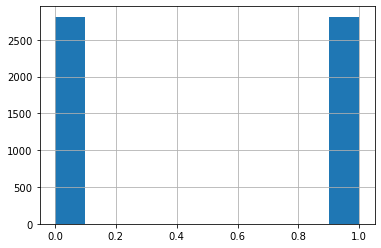

In [200]:
tesla.df['label'].hist()

In [307]:
def mean_vectorize(tx):
    temp = np.mean([model1[i.lower()] for i in word_tokenize(tx)],axis=0).tolist()
    return temp
dataset = tesla.df.dropna()
inputs = dataset[['text']].apply(
    lambda row : mean_vectorize(row.text)
    ,axis=1)

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs.tolist(), dataset['label'].astype(int), test_size=0.3, shuffle=True)

In [315]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9819567979669631
0.5388263189093064
